In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DSAI/customer_churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
for i in data.columns:
  print(i,data[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

Text(0, 0.5, 'count')

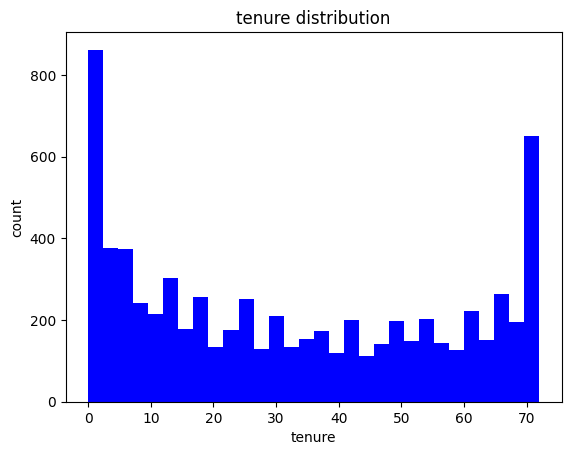

In [ ]:
plt.hist(data['tenure'],bins=30,color='blue')
plt.title('tenure distribution')
plt.xlabel('tenure')
plt.ylabel('count')

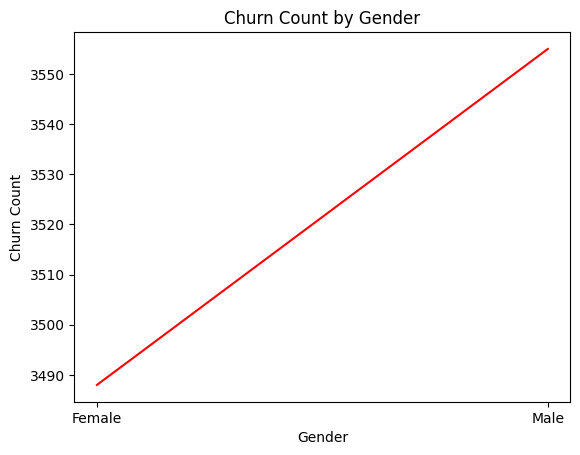

In [ ]:
churn_by_gender = data.groupby('gender')['Churn'].count()


plt.plot(churn_by_gender.index, churn_by_gender.values, color='red')
plt.xlabel('Gender')
plt.ylabel('Churn Count')
plt.title('Churn Count by Gender')
plt.show()

In [ ]:
churn_by_gender = data.groupby('gender')['Churn'].count()
churn_by_gender

,Churn
gender,
Female,3488
Male,3555


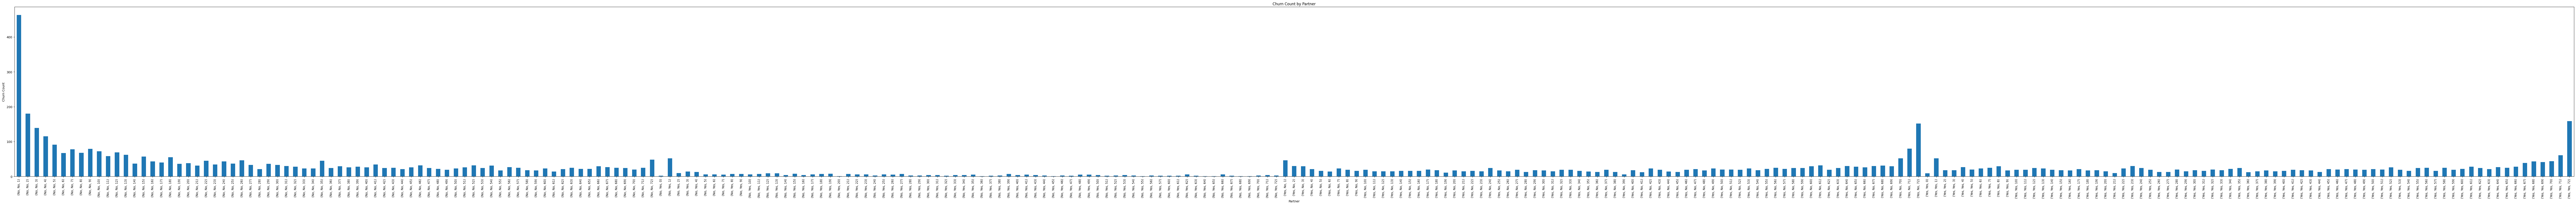

In [ ]:
data.groupby(['Partner','Dependents','tenure'])['Churn'].count().plot(kind='bar',figsize=(150,10))
plt.xlabel('Partner')
plt.ylabel('Churn Count')
plt.title('Churn Count by Partner')
plt.show()

In [ ]:
!pip install -U ydata-profiling[notebook]

from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.5 MB/s eta 0:00:00
   

In [ ]:
profile = ProfileReport(data, title="Data Profiling Report", explorative=True)

# Display the report in a Jupyter Notebook
profile.to_notebook_iframe()

# Save the report to an HTML file
profile.to_file("customer_data_report.html")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Text(0.5, 1.0, 'Churn Count by SeniorCitizen')

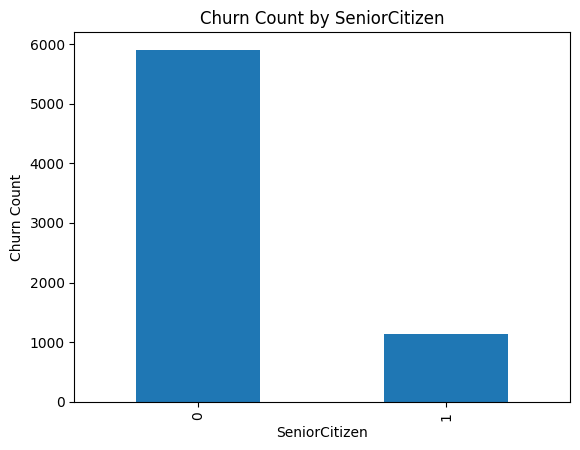

In [ ]:
data.groupby(['SeniorCitizen'])['Churn'].count().plot(kind='bar')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn Count')
plt.title('Churn Count by SeniorCitizen')

Text(0.5, 1.0, 'Churn Count by DeviceProtection')

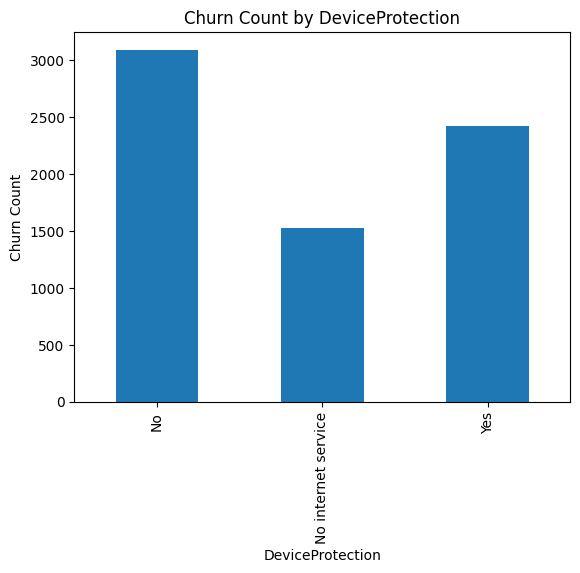

In [ ]:
data.groupby(['DeviceProtection'])['Churn'].count().plot(kind='bar')
plt.xlabel('DeviceProtection')
plt.ylabel('Churn Count')
plt.title('Churn Count by DeviceProtection')

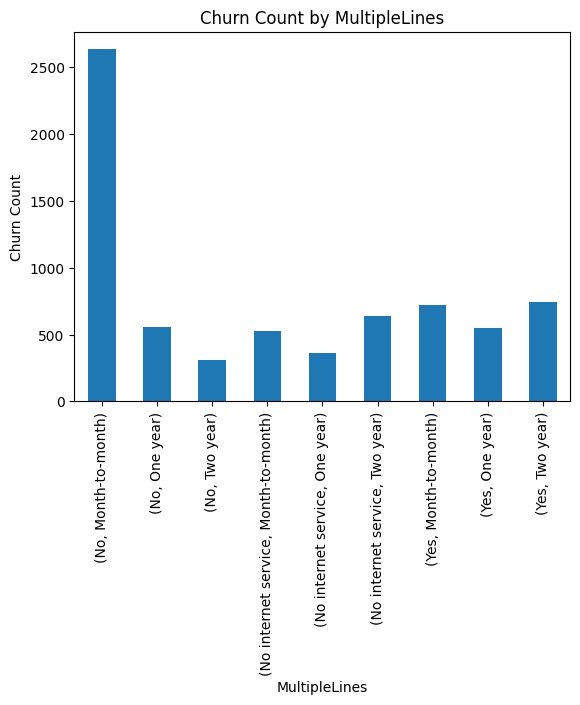

In [ ]:
data.groupby(['OnlineSecurity','Contract'])['Churn'].count().plot(kind='bar')
plt.xlabel('MultipleLines')
plt.ylabel('Churn Count')
plt.title('Churn Count by MultipleLines')
plt.show()

Text(0, 0.5, 'Churn Count')

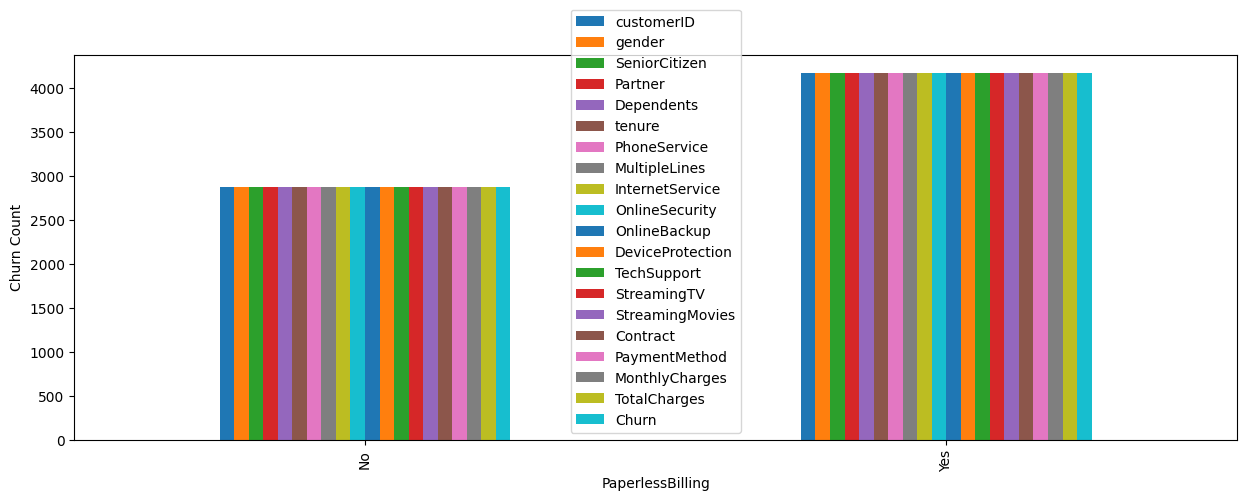

In [ ]:
data.groupby(['PaperlessBilling']).count().plot(kind='bar',figsize=(15,5))
plt.xlabel('PaperlessBilling')
plt.ylabel('Churn Count')

Text(0, 0.5, 'Churn Count')

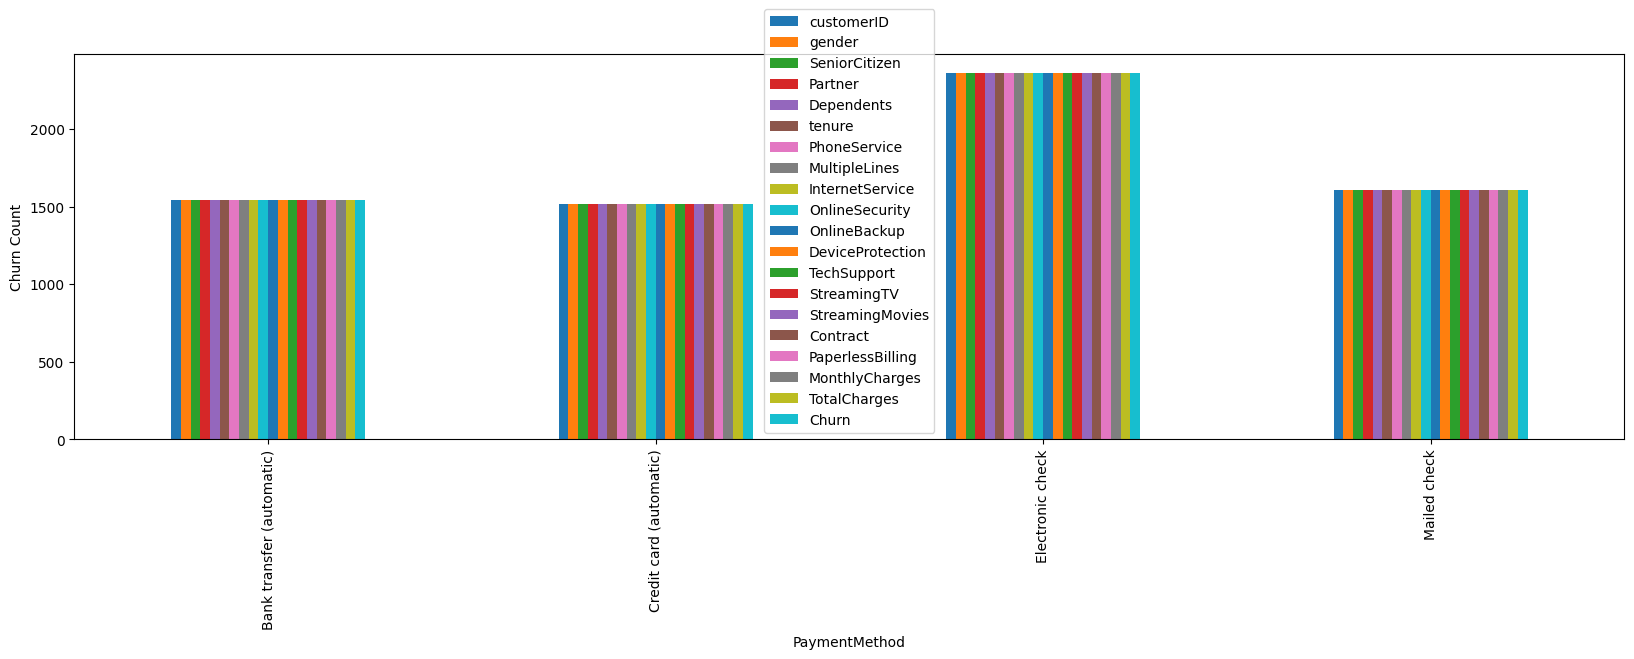

In [ ]:
data.groupby(['PaymentMethod']).count().plot(kind='bar',figsize=(20,5))
plt.xlabel('PaymentMethod')
plt.ylabel('Churn Count')

In [ ]:

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(0, inplace=True)


<ipython-input-21-9c69eb898724>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(0, inplace=True)


In [ ]:
data['TotalCharges'] = data['TotalCharges'].astype(float)


In [ ]:
data['totalchargesnew']=np.where(data['TotalCharges']>data['TotalCharges'].mean(),'maximum totalcharges','low totalcharges')

Text(0, 0.5, 'Churn Count')

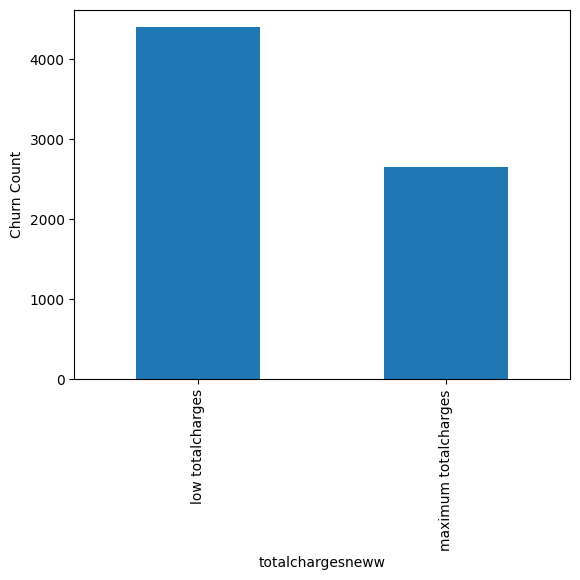

In [ ]:
data.groupby(['totalchargesnew'])['Churn'].count().plot(kind='bar')
plt.xlabel('totalchargesneww')
plt.ylabel('Churn Count')

In [ ]:
data['montchargnew']=np.where(data['MonthlyCharges']>data['MonthlyCharges'].mean(),'highMcharges','lowMcharges')

Text(0, 0.5, 'Churn Count')

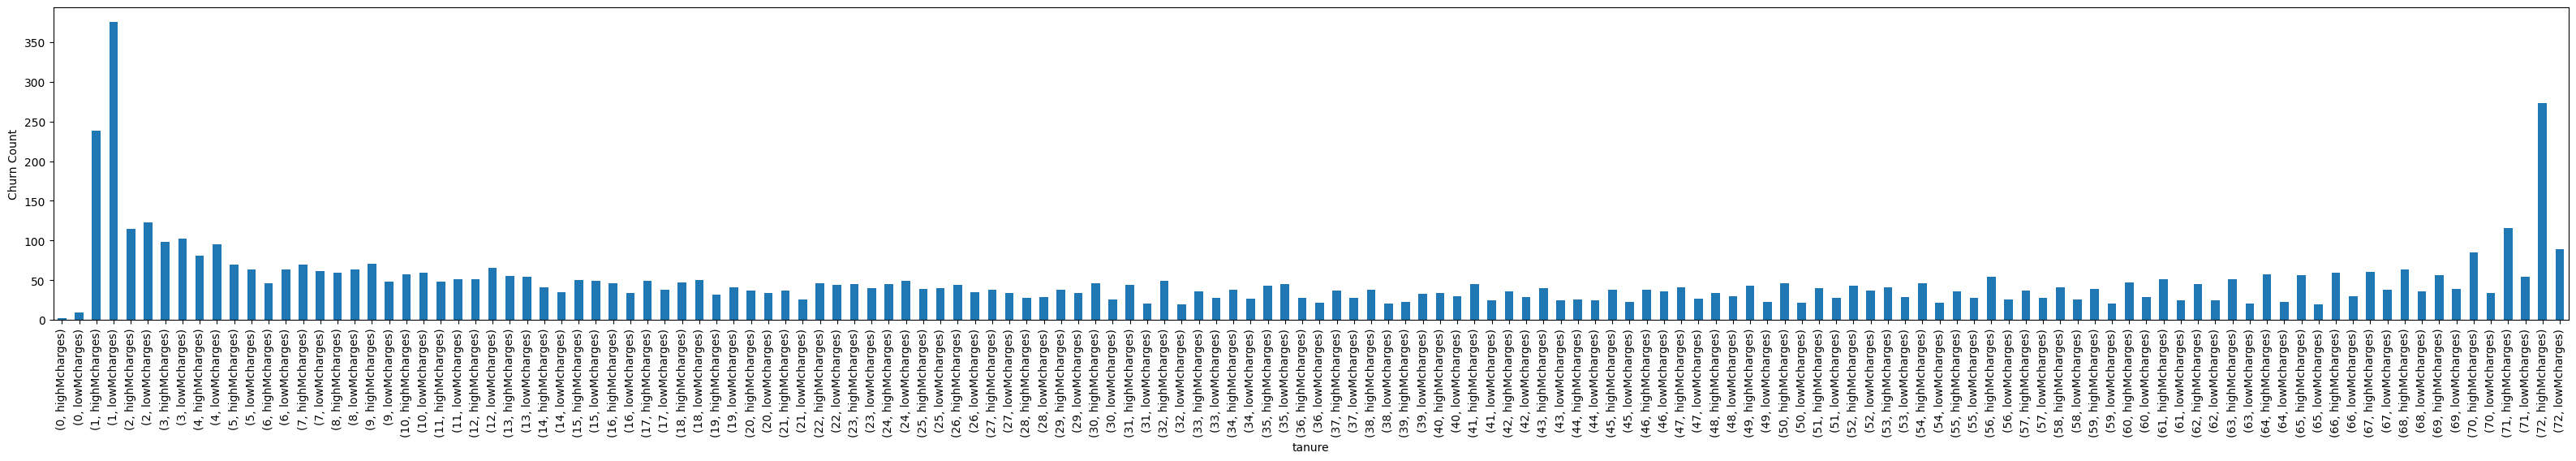

In [ ]:
data.groupby(['tenure','montchargnew'])['Churn'].count().plot(kind='bar',figsize=(40,5))
plt.xlabel('tanure')
plt.ylabel('Churn Count')

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder,LabelEncoder


In [ ]:
x=data.loc[:,['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling',
       'PaymentMethod','MonthlyCharges']]
y=data.loc[:,['Churn']]

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(x[['Partner', 'gender','Dependents','PhoneService','PaperlessBilling']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

encoded_df

,Partner_Yes,gender_Male,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,1.0
7039,1.0,0.0,1.0,1.0,1.0
7040,1.0,0.0,1.0,0.0,1.0
7041,1.0,1.0,0.0,1.0,1.0


In [ ]:
x=x.drop(['Partner', 'gender','Dependents','PhoneService','PaperlessBilling'],axis=1)

In [ ]:
label=LabelEncoder()

for col in ['InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract','PaymentMethod']:
    x[col] = label.fit_transform(x[col])



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x['MonthlyCharges']=scaler.fit_transform(x[['MonthlyCharges']])
x['tenure']=scaler.fit_transform(x[['tenure']])


In [ ]:
x

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges
0,0,-1.277445,0,0,2,0,0,0,2,-1.160323
1,0,0.066327,0,2,0,2,0,1,3,-0.259629
2,0,-1.236724,0,2,2,0,0,0,3,-0.362660
3,0,0.514251,0,2,0,2,2,1,0,-0.746535
4,0,-1.236724,1,0,0,0,0,0,2,0.197365
...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0,2,0,2,2,1,3,0.665992
7039,0,1.613701,1,0,2,2,0,1,1,1.277533
7040,0,-0.870241,0,2,0,0,0,0,2,-1.168632
7041,1,-1.155283,1,0,0,0,0,0,3,0.320338


In [ ]:
x=pd.concat([x,encoded_df],axis=1)

In [ ]:
x

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,Partner_Yes,gender_Male,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,-1.277445,0,0,2,0,0,0,2,-1.160323,1.0,0.0,0.0,0.0,1.0
1,0,0.066327,0,2,0,2,0,1,3,-0.259629,0.0,1.0,0.0,1.0,0.0
2,0,-1.236724,0,2,2,0,0,0,3,-0.362660,0.0,1.0,0.0,1.0,1.0
3,0,0.514251,0,2,0,2,2,1,0,-0.746535,0.0,1.0,0.0,0.0,0.0
4,0,-1.236724,1,0,0,0,0,0,2,0.197365,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0,2,0,2,2,1,3,0.665992,1.0,1.0,1.0,1.0,1.0
7039,0,1.613701,1,0,2,2,0,1,1,1.277533,1.0,0.0,1.0,1.0,1.0
7040,0,-0.870241,0,2,0,0,0,0,2,-1.168632,1.0,0.0,1.0,0.0,1.0
7041,1,-1.155283,1,0,0,0,0,0,3,0.320338,1.0,1.0,0.0,1.0,1.0


In [ ]:
y_encoded=encoder.fit_transform(y)
y_encoded=pd.DataFrame(y_encoded,columns=encoder.get_feature_names_out())
y=pd.DataFrame(y_encoded,columns=encoder.get_feature_names_out())

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
rnd = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50)
rnd.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=50)

# **RandomForestClassifier**

In [ ]:
y_pred1 = rnd.predict(x_test)

In [ ]:
train_accuracy = rnd.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = rnd.score(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 86.07%
Testing Accuracy: 80.62%


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,150, 200,250,300,500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rnd, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 5 folds for each of 189 candidates, totalling 945 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.7996097720886176


In [ ]:
classification_report = classification_report(y_test, y_pred1)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1036
         1.0       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[944  92]
 [181 192]]


# **LogisticRegression**

In [ ]:
linm=LogisticRegression(C=10)
linm.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10)

In [ ]:
train_accuracy = linm.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = linm.score(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 80.03%
Testing Accuracy: 81.97%


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(linm, param_grid, cv=5)
grid.fit(x_train, y_train)
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'C': 100}
Best Score: 0.7969475225413356


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred2=linm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred2)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[933 103]
 [151 222]]


# **VotingClassifier**

In [ ]:
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the models
model1 = LogisticRegression()
model2 = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50)
model3 = GradientBoostingClassifier()

# Combine using voting for classification
voting_clf = VotingClassifier(estimators=[('lr', model1), ('rf', model2),('gb',model3)], voting='hard')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
train_accuracy = voting_clf.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = voting_clf.score(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 83.35%
Testing Accuracy: 81.48%


In [ ]:
y_pred3=voting_clf.predict(x_test)

In [ ]:
cls_report = classification_report(y_test, y_pred3)
print("Classification Report:")
print(cls_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1036
         1.0       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
cns_materix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cns_materix)

Confusion Matrix:
[[944  92]
 [169 204]]


# **Choose the best model**

**After comparing all the suitable models, checking their accuracy score and and checking the classification report,we found that VotingClassifier is the best method to predict customer  churn**.